In [73]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import Rbf

import seaborn as sns
sns.set_context('notebook')

In [62]:
def circle(number_of_points, radius=1., examples=(1,-1)):
    a = np.linspace(-1.0, 1.0, number_of_points+1)[:-1]
    b = np.linspace(-1.0, 1.0, number_of_points+1)[:-1]
    
    x = -np.cos(np.pi*a)*radius
    y = np.sin(np.pi*b)*radius
    
    values = np.array(examples*(number_of_points//len(examples)+1))[:number_of_points]
    
    return x,y, values   

In [63]:
x,y,values = circle(6)
x.shape, y.shape, values.shape

((6,), (6,), (6,))

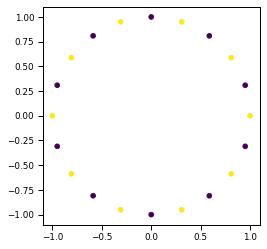

In [64]:
x,y,values = circle(20)
plt.scatter(x,y,c=values, marker='o')
plt.gca().set_aspect('equal')

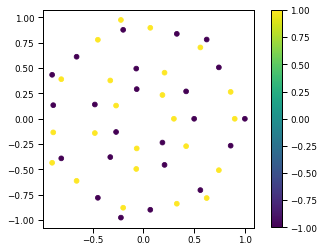

In [65]:
x,y,values = circle(7, radius=0.3, examples=(1,-1))
plt.scatter(x,y,c=values, marker='o')

x,y,values = circle(11, radius=0.5, examples=(-1,1))
plt.scatter(x,y,c=values, marker='o')

x,y,values = circle(21, radius=0.9, examples=(1,-1))
plt.scatter(x,y,c=values, marker='o')

x,y,values = circle(7, examples=(-1,1))
plt.scatter(x,y,c=values, marker='o')
plt.colorbar()
plt.gca().set_aspect('equal')

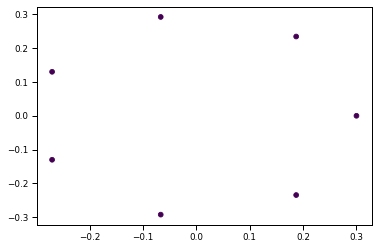

In [66]:
x,y,values = circle(7, radius=0.3, examples=(1,1))
plt.scatter(x,y,c=values, marker='o')

In [67]:
x0,y0,v0 = circle(7, radius=0.3, examples=(1,-1))
x1,y1,v1 = circle(11, radius=0.5, examples=(-1,1))
x2,y2,v2 = circle(21, radius=0.9, examples=(1,-1))
x3,y3,v3 = circle(7, radius=1.0, examples=(-1,1))

x_series = np.concatenate([x0,x1,x2,x3])
y_series = np.concatenate([y0,y1,y2,y3])
v_series = np.concatenate([v0,v1,v2,v3])

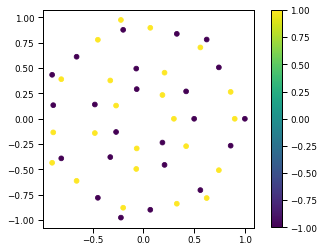

In [68]:
plt.scatter(x_series, y_series, c=v_series, marker='o')
plt.colorbar()
plt.gca().set_aspect('equal')

In [150]:
rbfi = Rbf(x_series, y_series, v_series, function='inverse', norm='chebyshev')

In [151]:
x = np.linspace(-1.5, 1.5, 1000)
y = np.linspace(-1.5, 1.5, 1000)
xv, yv = np.meshgrid(x, y)

In [152]:
result = rbfi(xv, yv)
result.shape

(1000, 1000)

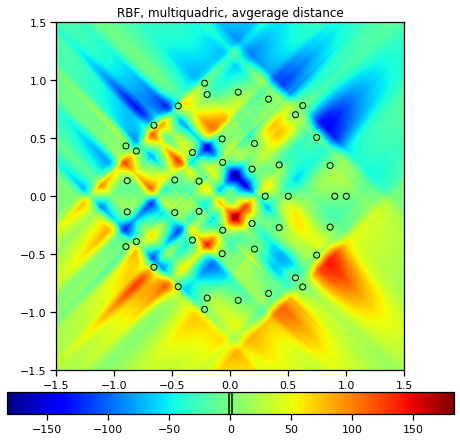

In [153]:
plt.figure(figsize=(8,8))
plt.title('RBF, multiquadric, avgerage distance')
plt.imshow(result, extent=[-1.5,1.5,-1.5,1.5], origin='lower',
           vmin=-np.abs(result).max(),
           vmax=np.abs(result).max(), cmap='jet'
          )
plt.scatter(x_series, y_series, c=v_series, marker='o', edgecolors='k',
           vmin=-np.abs(result).max(),
           vmax=np.abs(result).max(), cmap='jet'
           )
cb = plt.colorbar(orientation="horizontal", pad=0.05)
cb.ax.axvline(1, c='k')
cb.ax.axvline(-1, c='k')